In [1]:
import numpy as np
from ximeaWFS import *
from ALPAODM import *
from pyRTC.Loop import *

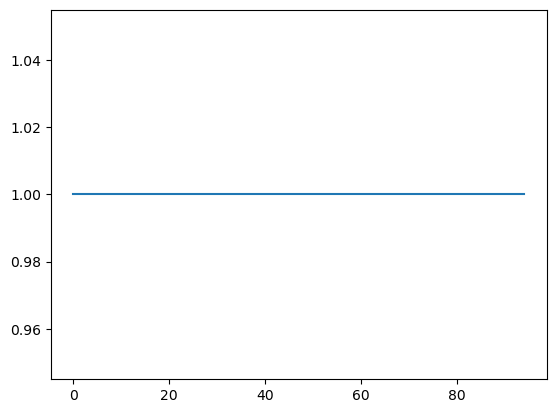

In [2]:
M2C = np.fromfile("/etc/chai/m2c.dat", dtype=np.float64).reshape(97,95)
for i in range(M2C.shape[1]):
    M2C[:,i] /= np.std(M2C[:,i])
plt.plot(np.std(M2C, axis = 0))
plt.show()

Creating New Shared Memory Object {self.name}


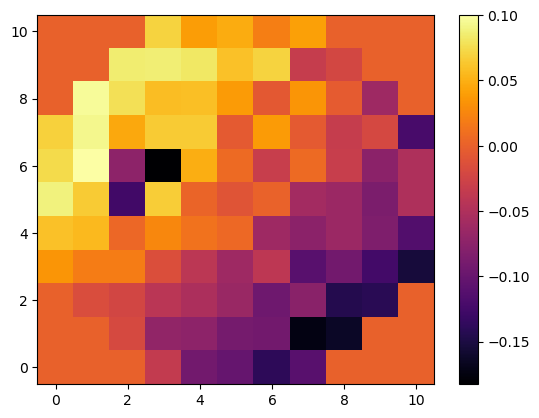

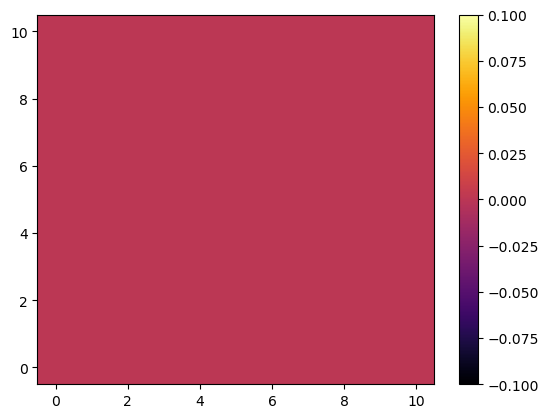

In [3]:
dm = ALPAODM(97, "BAX118", flatFile = "/etc/chai/dm_flat.txt", M2C=M2C)
dm.plot()
dm.plot(removeFlat=True)

xiAPI: ---- xiOpenDevice API:V4.27.09.00 started ----
xiAPI: XIMEA Camera API V4.27.09.00
xiAPI: Adding camera context: dwID=13056250  ptr=6C417000 processID=0005CACE
xiAPI: Create handles 1 Process 0005CACE
xiAPI: Enable sensor
xiAPI: ENABLE SENSOR
xiAPI: xiReadFileFFS Time needed to read file SensFPNCorrections :149ms
xiAPI: xiReadFileFFS Time needed to read file SensFPNCorrections :148ms
xiAPI: DISABLE SENSOR
xiAPI: ENABLE SENSOR
xiAPI: Set gain 1.060000 ADC 01E3 DIGIT 0087
xiAPI: Set gain 1.060000 ADC 01E3 DIGIT 0087
xiAPI: Time needed to read BPL:25ms
xiAPI: Successfully parsed BPL file, 339 total corrected pixels
xiAPI: Set gain 1.060000 ADC 01E3 DIGIT 0087
xiAPI: AutoSetBandwidth measurement
xiAPI: CalculateResources : Context 6C417000 ID 13056250 m_maxBytes=1024 m_maxBufferSize=1048576
xiAPI: PoolAllocUSB30: zerocopy not available
xiAPI: Failed to change thread scheduler, check user limit for realtime priority.
xiAPI: AutoSetBandwidth measured 3572Mbps. Safe margin 10% will be 

Creating New Shared Memory Object {self.name}
Creating New Shared Memory Object {self.name}
Opening Existing Shared Memory Object {self.name}
Opening Existing Shared Memory Object {self.name}


xiAPI: StartVideoStream
xiAPI: Set gain 1.060000 ADC 01E3 DIGIT 0087
xiAPI: Failed to change thread scheduler, check user limit for realtime priority.
xiAPI: WorkerThread is up


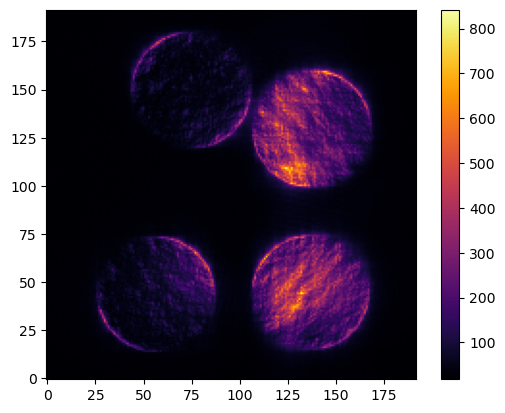

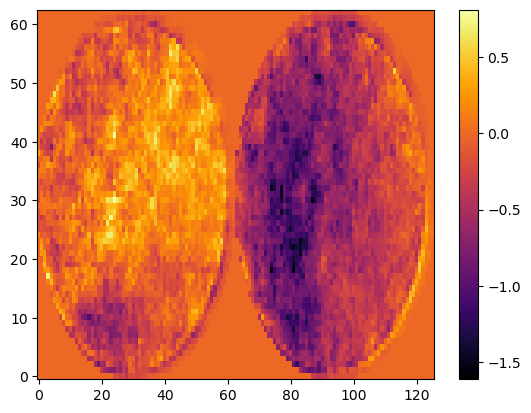

In [4]:
#Create camera object, take an image
wfs = XIMEA_WFS(exposure=3333, roi=[192,192,272,50], binning=2, gain=0, bitDepth=10)
wfs.setPupils([(58,44),(139,45),(76,150),(139,130)], 32)
wfs.expose()
wfs.computeSignal()
wfs.plot()
# print(wfs.read())
# # wfs.plotPupils()
# del wfs

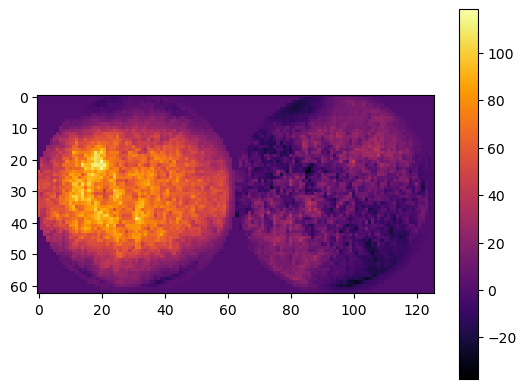

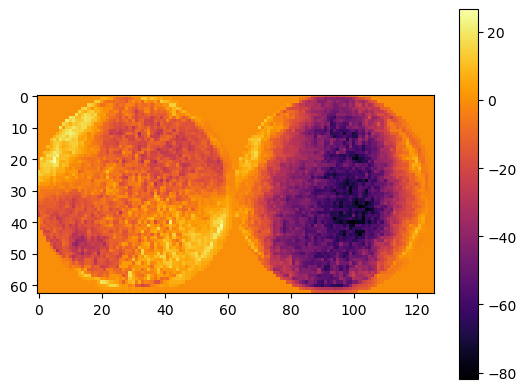

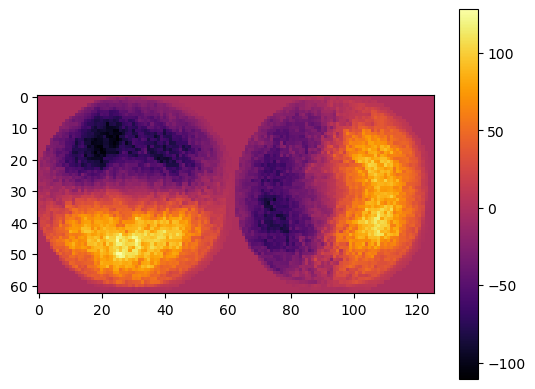

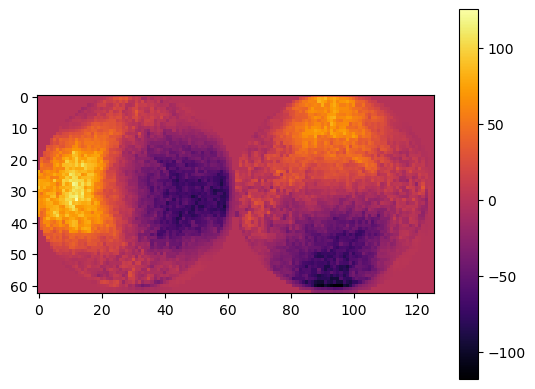

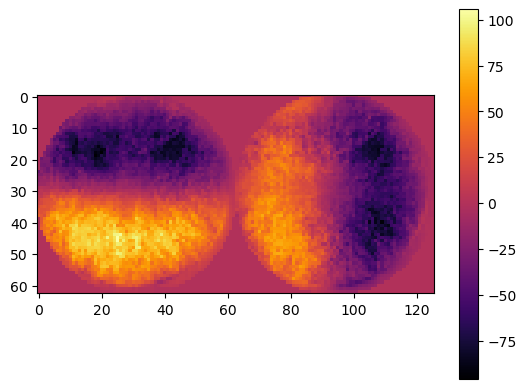

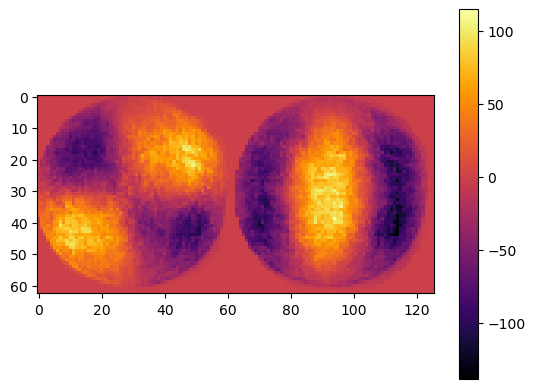

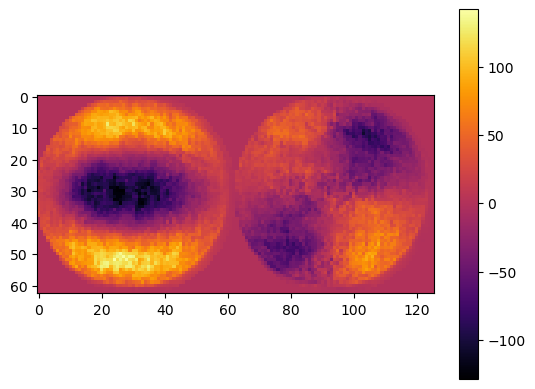

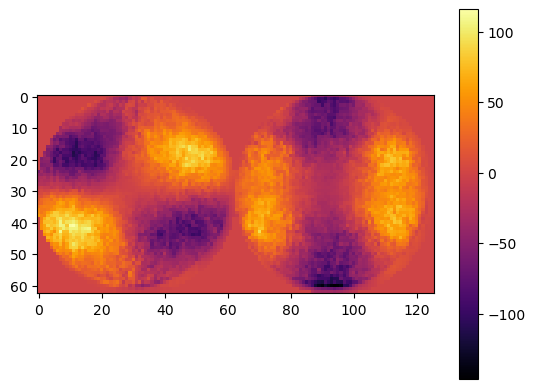

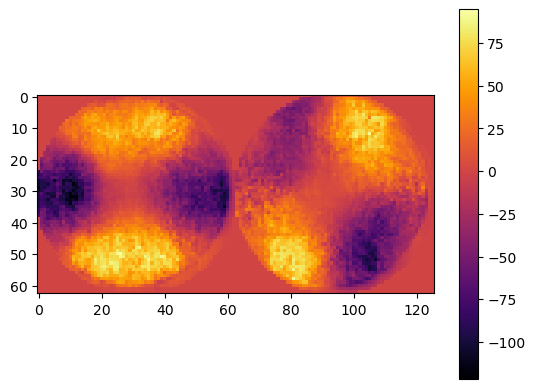

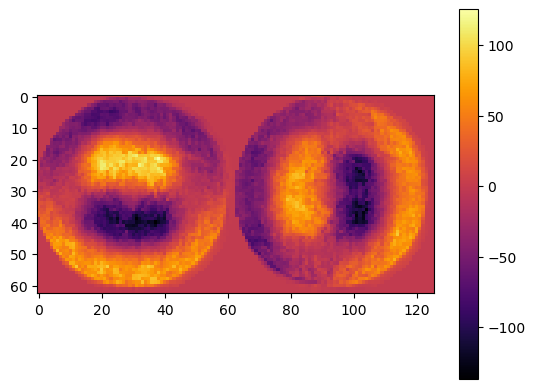

In [5]:
loop = Loop(wfs, dm)
loop.computeIM(0.01,N=100)
for i in range(10):
    loop.plotIM(row=i)

In [6]:
# del wfs
# del dm
# del loop

In [7]:
# print(np.linalg.pinv(np.eye(97)))

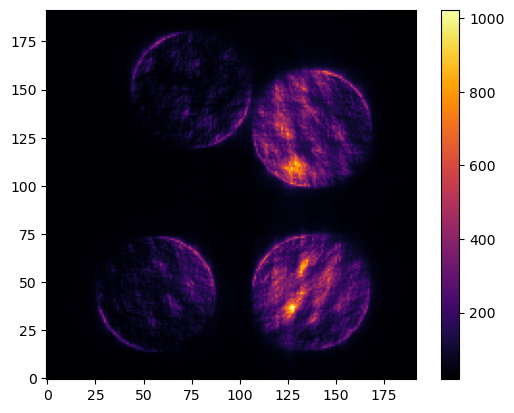

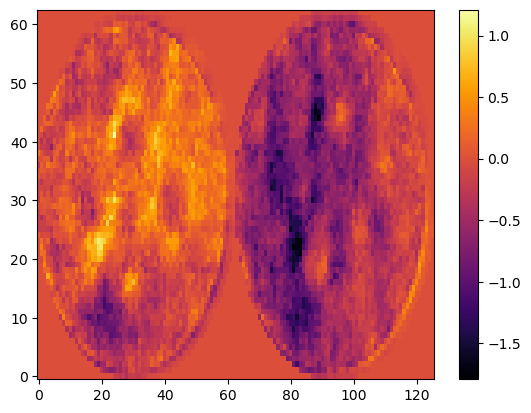

In [8]:
wfs.plot()

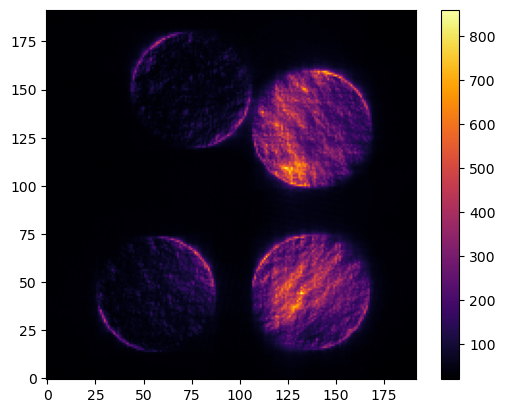

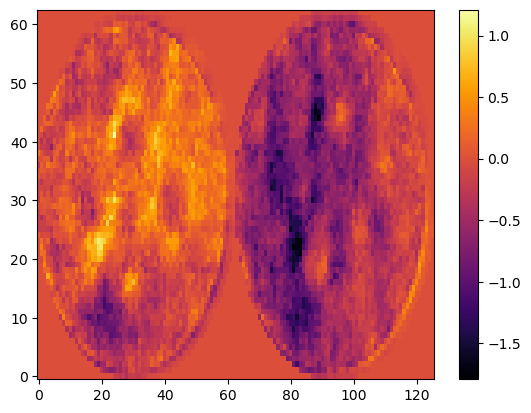

In [9]:
wfs.expose()
wfs.plot()